In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import yfinance as yf 
import talib as ta
plt.style.use('seaborn')

In [29]:
crypto = ['BTC-USD']

In [83]:
df = yf.download(tickers = crypto, start= '2014-01-01', end= '2021-12-20', interval='1D')

[*********************100%***********************]  1 of 1 completed


In [72]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-15,465.864014,468.174011,384.532013,398.821014,398.821014,156903400
2014-09-22,399.100006,441.557007,374.332001,377.181000,377.181000,186772600
2014-09-29,376.928009,391.378998,289.295990,320.510010,320.510010,276657896
2014-10-06,320.389008,382.726013,302.559998,378.549011,378.549011,341152804
2014-10-13,377.920990,411.697998,368.897003,389.545990,389.545990,156902070
...,...,...,...,...,...,...
2021-11-22,58706.847656,59367.968750,53569.765625,57248.457031,57248.457031,243930001011
2021-11-29,57291.906250,59113.402344,42874.617188,49368.847656,49368.847656,276690611812
2021-12-06,49413.480469,51934.781250,46942.347656,50098.335938,50098.335938,208148497532


In [73]:
df.reset_index(inplace=True)

In [74]:
df['SMA50'] = ta.SMA(df['Close'], timeperiod= 50)
df['SMA100'] = ta.SMA(df['Close'], timeperiod= 100)

In [75]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']), go.Scatter(x=df['Date'], y=df['SMA50'], line=dict(color='orange', width=1)),
                                                  go.Scatter(x=df['Date'], y=df['SMA100'], line=dict(color='green', width=1))])
fig.show()

Text(0.5, 1.0, 'BTC Cyclical Trend')

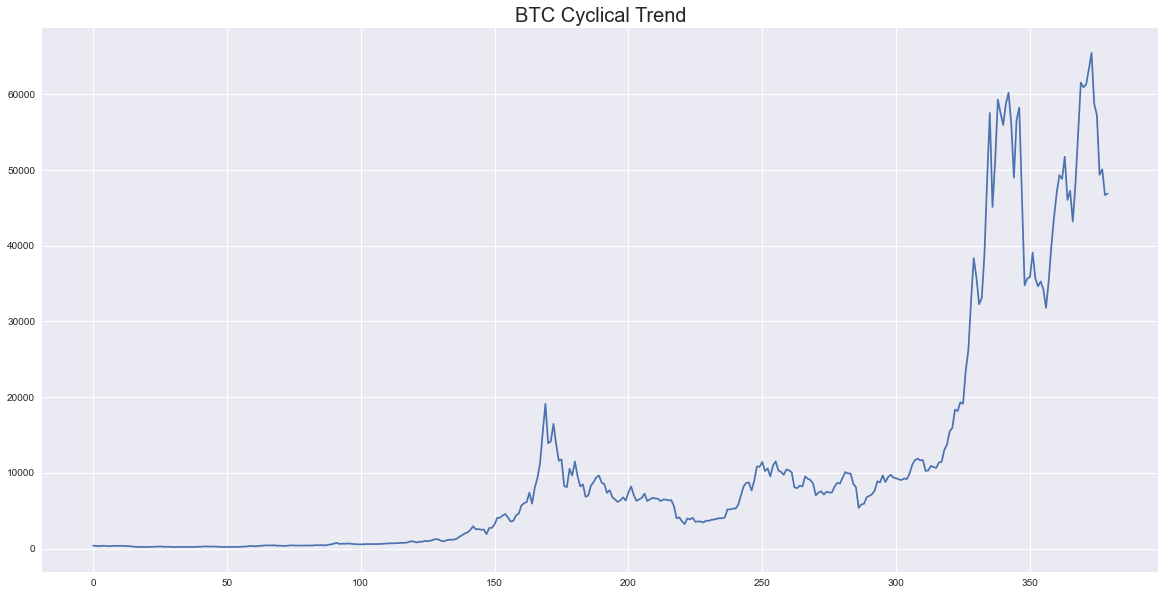

In [76]:
df.Close.plot(figsize=(20,10))
plt.title('BTC Cyclical Trend', fontsize= 20)

In [77]:
df['returns'] = np.log(df['Close']/df['Close'].shift(1))

Text(0.5, 1.0, 'BTC Cylicale Trend')

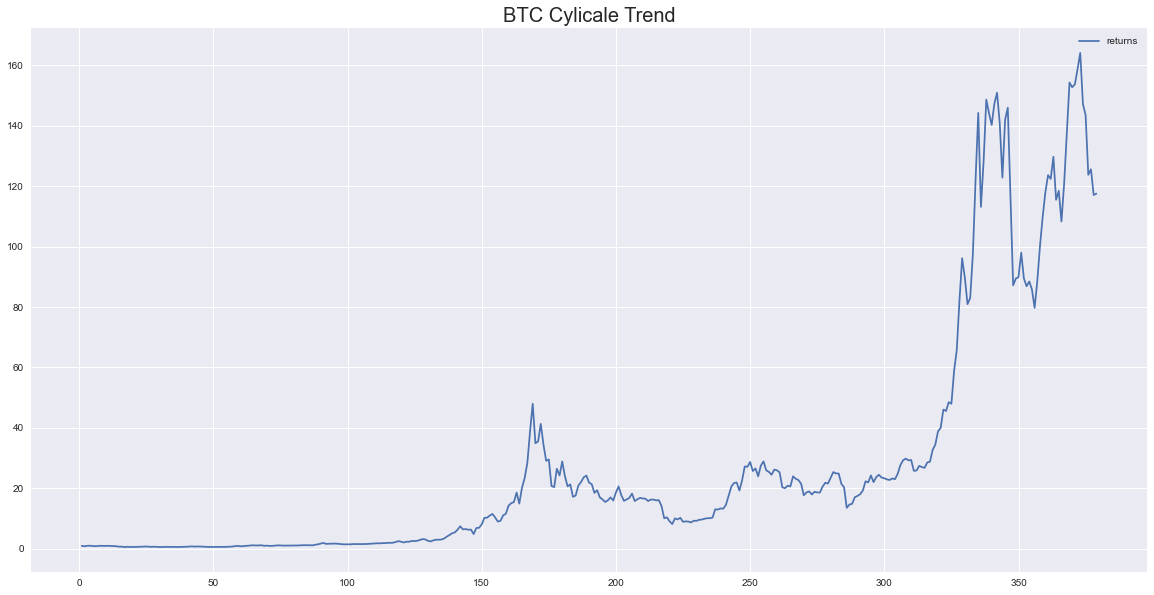

In [78]:
df[['returns']].dropna().cumsum().apply(np.exp).plot(figsize = (20, 10))
plt.title('BTC Cylicale Trend', fontsize= 20)

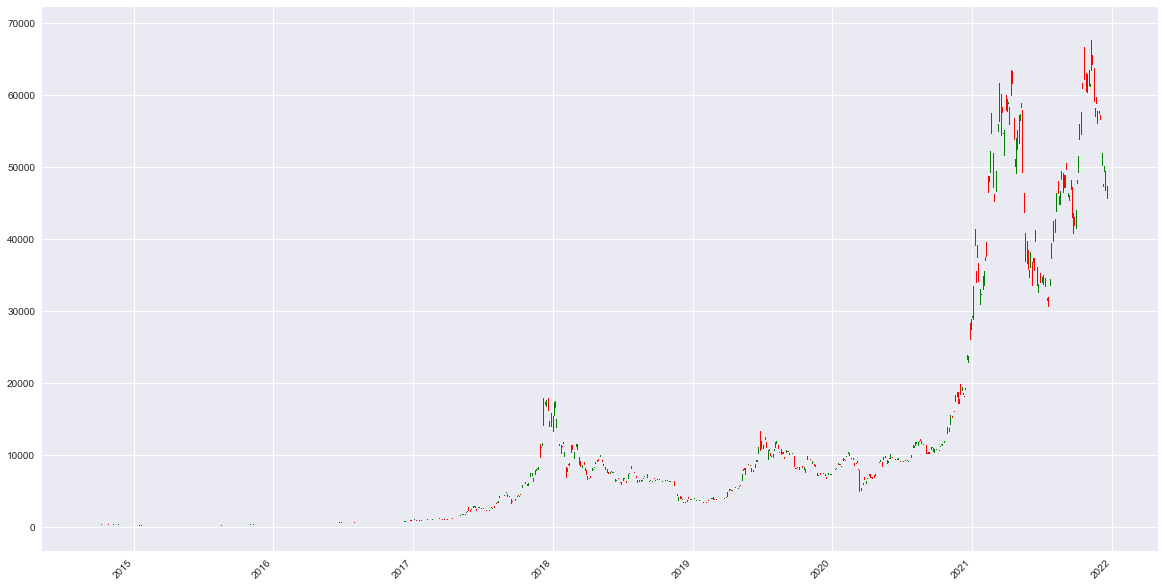

In [84]:
plt.figure(figsize=(20,10))
width = 0.75
width2 = 0.35

#define up and down prices
up = df[df.Close>=df.Open]
down = df[df.Close<df.Open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

In [ ]:
plt.figure(figsize = (24,13))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.fill_between(df.index, df.Upper, df.Lower, color = 'lightblue', alpha= 0.3)
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker='^', color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker='v', color='r')
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

In [ ]:
buys = []
sells = []
open_pos = False

for i in range(len(df)):
    if df.Lower[i] > df.Close[i]:
        if open_pos == False:
            buys.append(i)
            open_pos = True
            
    elif df.Upper[i] < df.Close[i]:
        if open_pos:
            sells.append(i)
            open_pos = False

In [ ]:
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)

In [ ]:
plt.figure(figsize = (24,13))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.fill_between(df.index, df.Upper, df.Lower, color = 'lightblue', alpha= 0.3)
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker='^', color='g')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker='v', color='r')
plt.legend(['Close', 'SMA', 'Upper', 'Lower'], fontsize = 25)
plt.title('BTC| Mean Reversion System | Over Trading', fontsize = 25)

In [ ]:
plt.figure(figsize = (24,13))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.fill_between(df.index, df.Upper, df.Lower, color = 'lightblue', alpha= 0.3)
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker='^', color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker='v', color='r')
plt.legend(['Close', 'SMA', 'Upper', 'Lower'], fontsize = 20)
plt.title('BTC| Mean Reversion System | Optimized Signals', fontsize = 25)